In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set_theme(rc = {'figure.figsize':(15,8)},font ='Malgun Gothic', style="whitegrid")
sns.set_color_codes("pastel")

In [2]:
age_acc = pd.read_csv('./data/kosis_data/age_acc.csv',encoding='cp949')
age_acc = age_acc.loc[age_acc['연령층별(1)']!='불명']
age_acc = age_acc.iloc[1:,:].reset_index().drop(columns=['index'])
age_acc
age_acc = pd.DataFrame({
            'age':list(age_acc['연령층별(1)'].values), 
            'month':list(age_acc['월별(1)'].values),
            '2017':[int(age_acc['2017'].values.__getitem__(x))+int(age_acc['2017.1'].values.__getitem__(x)) for x in range(len(age_acc))],
            '2018':[int(age_acc['2018'].values.__getitem__(x))+int(age_acc['2018.1'].values.__getitem__(x)) for x in range(len(age_acc))],
            '2019':[int(age_acc['2019'].values.__getitem__(x))+int(age_acc['2019.1'].values.__getitem__(x)) for x in range(len(age_acc))],
            '2020':[int(age_acc['2020'].values.__getitem__(x))+int(age_acc['2020.1'].values.__getitem__(x)) for x in range(len(age_acc))],
            '2021':[int(age_acc['2021'].values.__getitem__(x))+int(age_acc['2021.1'].values.__getitem__(x)) for x in range(len(age_acc))],
})
age_acc

,age,month,2017,2018,2019,2020,2021
0,12세이하,전체,13487,12577,14143,10524,11001
1,12세이하,1월,919,787,803,960,581
2,12세이하,2월,761,845,896,614,729
3,12세이하,3월,1006,958,1040,529,857
4,12세이하,4월,1187,1086,1170,792,990
...,...,...,...,...,...,...,...
112,71세이상,8월,2064,2067,2135,1770,1753
113,71세이상,9월,2350,2187,2197,2010,1858
114,71세이상,10월,2360,2448,2599,2139,2116
115,71세이상,11월,2230,2256,2444,1930,2005


In [3]:
age_acc.iloc[:,:]

,age,month,2017,2018,2019,2020,2021
0,12세이하,전체,13487,12577,14143,10524,11001
1,12세이하,1월,919,787,803,960,581
2,12세이하,2월,761,845,896,614,729
3,12세이하,3월,1006,958,1040,529,857
4,12세이하,4월,1187,1086,1170,792,990
...,...,...,...,...,...,...,...
112,71세이상,8월,2064,2067,2135,1770,1753
113,71세이상,9월,2350,2187,2197,2010,1858
114,71세이상,10월,2360,2448,2599,2139,2116
115,71세이상,11월,2230,2256,2444,1930,2005


In [4]:
tmp_df = age_acc.loc[age_acc['month']!='전체'].reset_index().drop(columns=['index'])
mean_y5 = [(tmp_df['2017'][x]+tmp_df['2018'][x]+tmp_df['2019'][x]+tmp_df['2020'][x]+tmp_df['2021'][x])/5 for x in range(len(tmp_df))]
tmp_df['mean_y5'] = mean_y5
tmp_df

,age,month,2017,2018,2019,2020,2021,mean_y5
0,12세이하,1월,919,787,803,960,581,810.0
1,12세이하,2월,761,845,896,614,729,769.0
2,12세이하,3월,1006,958,1040,529,857,878.0
3,12세이하,4월,1187,1086,1170,792,990,1045.0
4,12세이하,5월,1419,1279,1388,1091,1070,1249.4
...,...,...,...,...,...,...,...,...
103,71세이상,8월,2064,2067,2135,1770,1753,1957.8
104,71세이상,9월,2350,2187,2197,2010,1858,2120.4
105,71세이상,10월,2360,2448,2599,2139,2116,2332.4
106,71세이상,11월,2230,2256,2444,1930,2005,2173.0


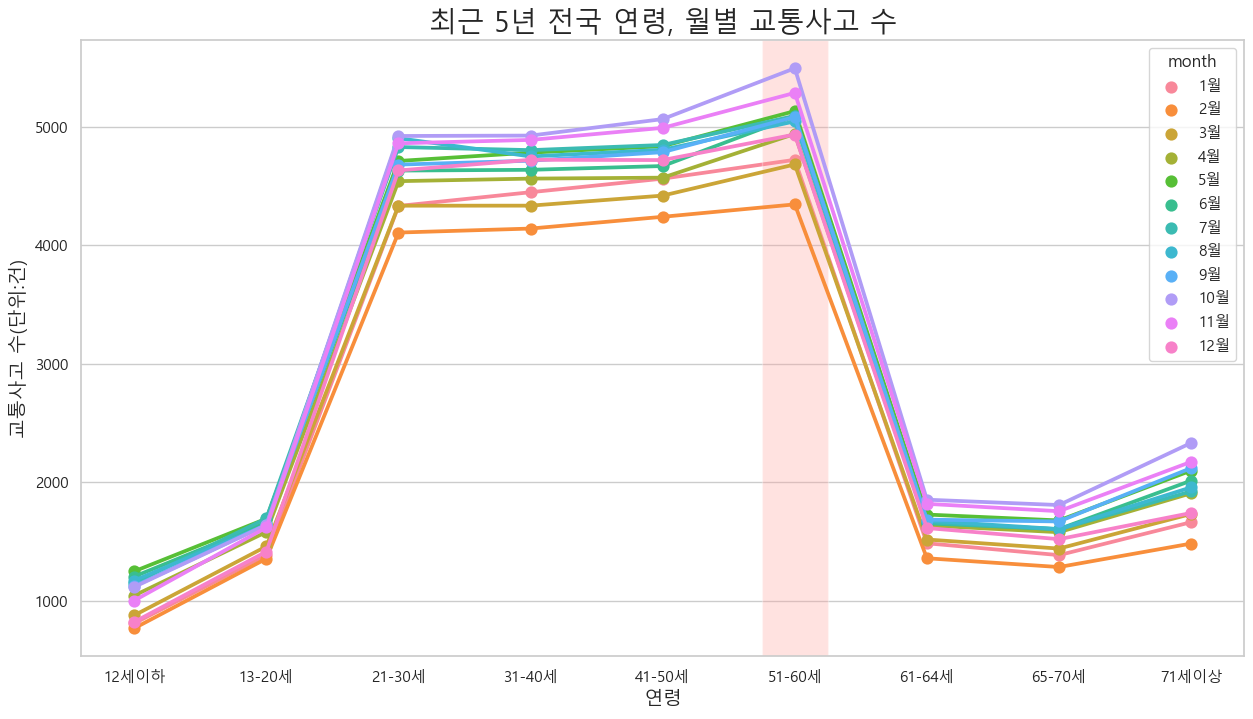

In [5]:
fig = plt.gcf()
sns.pointplot(x = tmp_df.age, y = tmp_df['mean_y5'], hue=tmp_df.month)
plt.axvspan(4.75, 5.25, facecolor='r', alpha=0.3)
plt.xlabel('연령', fontsize=14)
plt.ylabel('교통사고 수(단위:건)', fontsize=14)
plt.title('최근 5년 전국 연령, 월별 교통사고 수', fontsize=20)
fig.savefig('./pngs/kosis_type_age.png')

In [6]:
tmp_df.iloc[5::12,-1].values

array([1205.2, 1660.6, 4630.2, 4636.6, 4668.4, 5088.6, 1654.2, 1605.4,
       2014.2])

In [7]:
[x for x in set(tmp_df['age'].values)]

['21-30세',
 '51-60세',
 '12세이하',
 '13-20세',
 '61-64세',
 '41-50세',
 '65-70세',
 '31-40세',
 '71세이상']

In [8]:
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
df

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


In [9]:
df['group'].values

array(['A', 'B', 'C', 'D'], dtype=object)

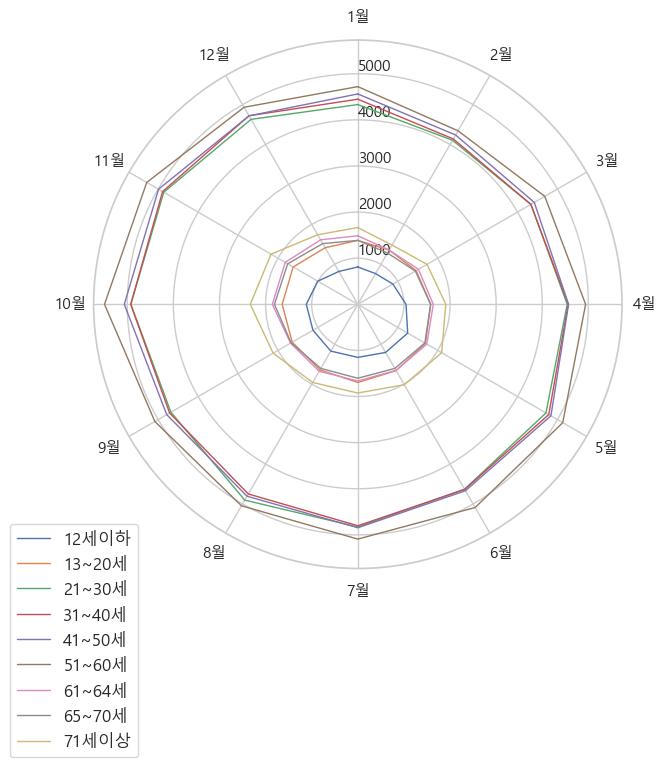

In [10]:
# Libraries
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['12세이하','13~20세','21~30세','31~40세','41~50세','51~60세','61~64세','65~70세','71세이상'],
'1월': tmp_df.iloc[0::12,-1].values,
'2월': tmp_df.iloc[1::12,-1].values,
'3월': tmp_df.iloc[2::12,-1].values,
'4월': tmp_df.iloc[3::12,-1].values,
'5월': tmp_df.iloc[4::12,-1].values,
'6월': tmp_df.iloc[5::12,-1].values,
'7월': tmp_df.iloc[6::12,-1].values,
'8월': tmp_df.iloc[7::12,-1].values,
'9월': tmp_df.iloc[8::12,-1].values,
'10월': tmp_df.iloc[9::12,-1].values,
'11월': tmp_df.iloc[10::12,-1].values,
'12월': tmp_df.iloc[11::12,-1].values,
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(121, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
# plt.yticks([400000,500000,600000,700000,800000,900000,1000000], ["400,000","500,000","600,000","700,000","800,000","900,000","1,000,000"], color="grey", size=12)
# plt.ylim(400000,1000000)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
# # Ind1
# values=df.loc[0].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="12세이하")
# ax.fill(angles, values, 'b', alpha=0.2)
 
# # Ind2
# values=df.loc[1].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="13~20세")
# ax.fill(angles, values, 'r', alpha=0.2)

# # Ind3
# values=df.loc[2].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="21~30세")
# ax.fill(angles, values, 'g', alpha=0.2)

for x in range(9):
    values=df.loc[x].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=df['group'].values[x])

 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize = 12)
# plt.title("2018~2020년 주요 세금 분포",fontsize=25, y=1.1)
# # Show the graph
# ax2 = plt.subplot(122, polar=False)
# sns.barplot(y=tmp['price'], x=tmp['세금'], hue=tmp['year'], ax=ax2, palette=['b','g','r'])
# plt.ylabel('가격', fontsize=20)
# plt.xlabel('세금', fontsize=20)
# plt.legend(fontsize=18)
# plt.title('2018~2020년 주요 세금 분포',fontsize = 25,y=1.057)
# plt.rc('font', size=15)
# plt.show()
# fig.savefig('./pngs/tax.png')

In [11]:
tmp_df = age_acc.loc[age_acc['month'] == '전체']
tmp_df

,age,month,2017,2018,2019,2020,2021
0,12세이하,전체,13487,12577,14143,10524,11001
13,13-20세,전체,22226,19528,19992,17026,15196
26,21-30세,전체,52714,53816,58257,57517,55099
39,31-40세,전체,56453,56012,59253,54712,52091
52,41-50세,전체,58747,58805,60451,53662,50867
65,51-60세,전체,62447,62407,65069,57070,52216
78,61-64세,전체,18497,20055,21879,19200,18829
91,65-70세,전체,18460,19307,20402,18216,18316
104,71세이상,전체,23886,24208,25511,21273,20873


In [12]:
location_acc = pd.read_csv('./data/kosis_data/location_acc.csv',encoding='cp949')
location_acc = location_acc.loc[location_acc['시도별(1)'].isin(['세종','충남','대전'])].iloc[:,[x for x in range(len(location_acc.columns)) if '.' not in location_acc.columns[x]]].reset_index().drop(columns=['index'])
location_acc = location_acc.astype({'2017':int,'2018':int,'2019':int,'2020':int,'2021':int})
location_acc

,시도별(1),월별(1),2017,2018,2019,2020,2021
0,대전,전체,7767,7554,8337,7215,7027
1,대전,1월,628,547,604,566,519
2,대전,2월,546,567,590,600,520
3,대전,3월,586,599,670,535,589
4,대전,4월,597,622,697,593,604
5,대전,5월,686,630,816,638,596
6,대전,6월,641,645,684,644,565
7,대전,7월,658,617,706,636,644
8,대전,8월,702,673,731,564,556
9,대전,9월,665,623,658,624,615


In [13]:
mean_y5 = [(location_acc['2017'][x]+location_acc['2018'][x]+location_acc['2019'][x]+location_acc['2020'][x]+location_acc['2021'][x])/5 for x in range(len(location_acc))]
location_acc['mean_y5'] = mean_y5

C:\Users\kland\AppData\Local\Temp\ipykernel_18660\2266012128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df.rename(columns={'시도별(1)':'지역구분'},inplace=True)


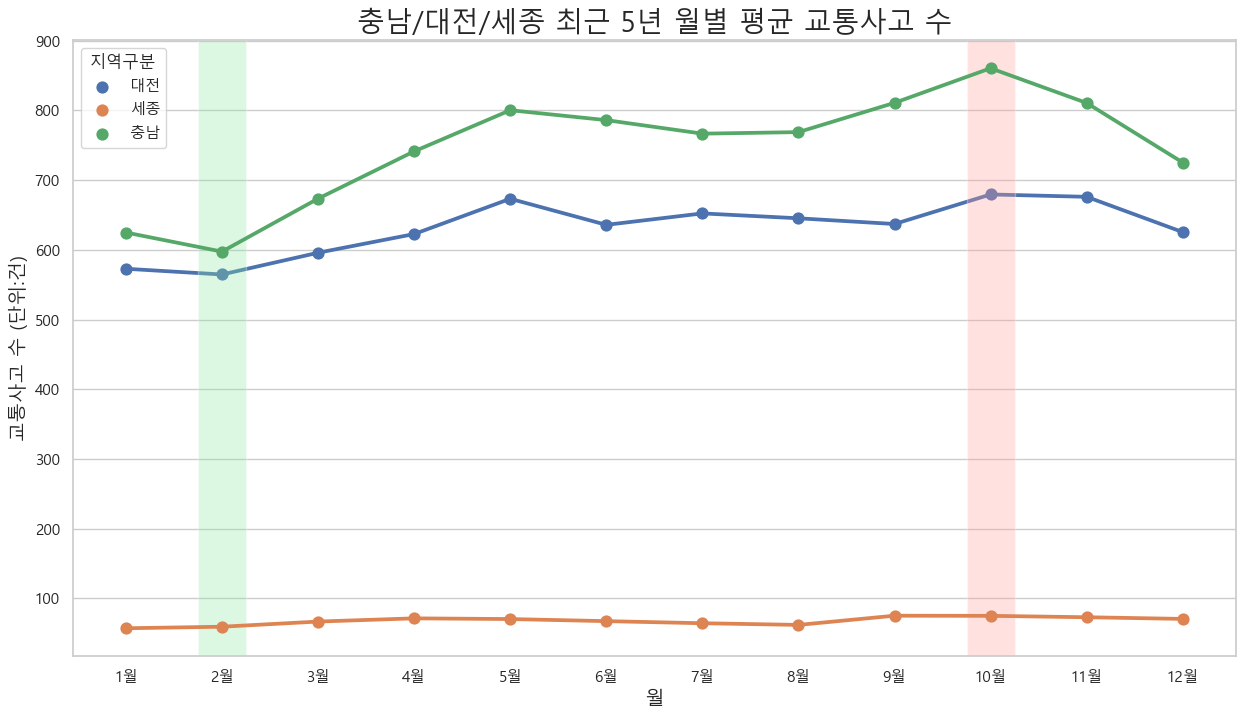

In [14]:
fig = plt.gcf()
tmp_df = location_acc[location_acc['월별(1)']!='전체']
tmp_df.rename(columns={'시도별(1)':'지역구분'},inplace=True)
sns.pointplot(hue=tmp_df['지역구분'], y=tmp_df['mean_y5'],x=tmp_df['월별(1)'] )
plt.axvspan(0.75, 1.25, facecolor='g', alpha=0.3)
plt.axvspan(8.75, 9.25, facecolor='r', alpha=0.3)
plt.xlabel('월',fontsize=14)
plt.ylabel('교통사고 수 (단위:건)',fontsize=14)
plt.title('충남/대전/세종 최근 5년 월별 평균 교통사고 수',fontsize=20)
fig.savefig('./pngs/kosis_type_month.png')

In [15]:
tmp_df = location_acc.loc[location_acc['월별(1)']=='전체']
tmp_df

,시도별(1),월별(1),2017,2018,2019,2020,2021,mean_y5
0,대전,전체,7767,7554,8337,7215,7027,7580.0
13,세종,전체,746,795,922,813,788,812.8
26,충남,전체,9241,8807,9404,8952,8423,8965.4


In [16]:
tmp_df = pd.DataFrame({'시도':['대전']*5+['세종']*5+['충남']*5,
             '사건수':[7767,7554,8337,7215,7027,746,795,922,813,788,9241,8807,9404,8952,8423],
             '년도':['2017','2018','2019','2020','2021']*3})
tmp_df

,시도,사건수,년도
0,대전,7767,2017
1,대전,7554,2018
2,대전,8337,2019
3,대전,7215,2020
4,대전,7027,2021
5,세종,746,2017
6,세종,795,2018
7,세종,922,2019
8,세종,813,2020
9,세종,788,2021


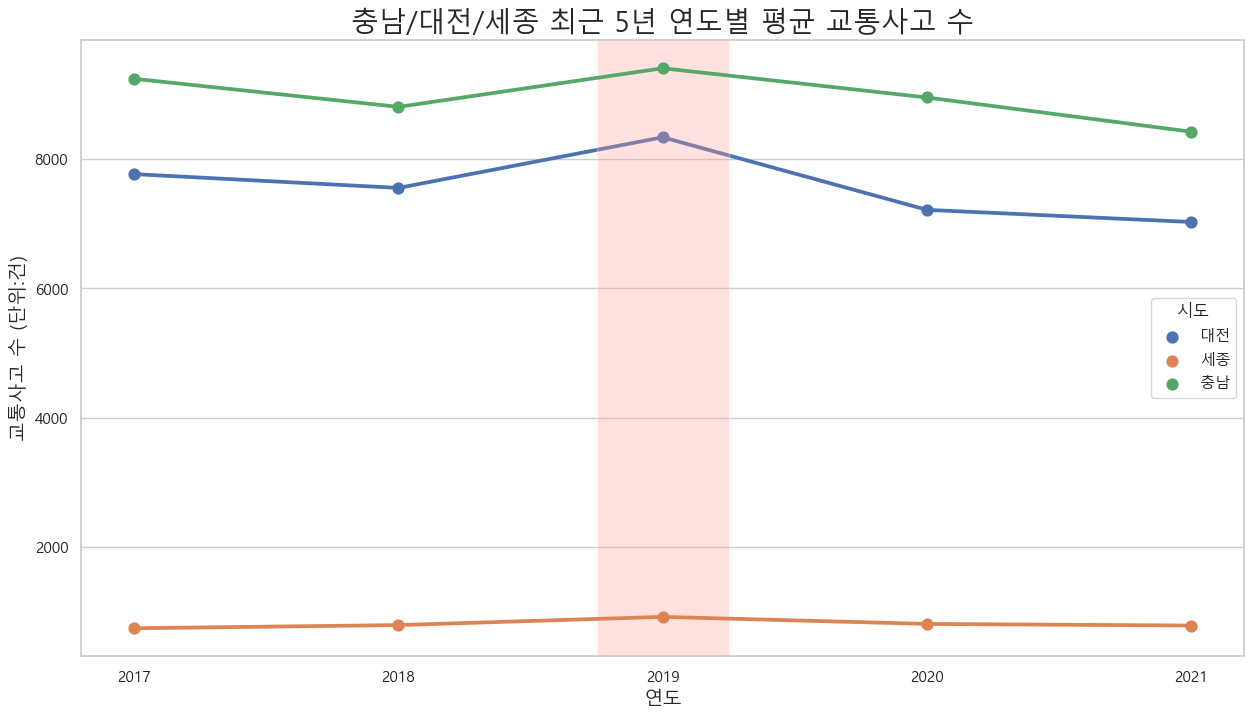

In [17]:
fig = plt.gcf()
sns.pointplot(hue=tmp_df['시도'], y=tmp_df['사건수'],x=tmp_df['년도'])
plt.axvspan(1.75, 2.25, facecolor='r', alpha=0.3)
plt.xlabel('연도',fontsize=14)
plt.ylabel('교통사고 수 (단위:건)',fontsize=14)
plt.title('충남/대전/세종 최근 5년 연도별 평균 교통사고 수',fontsize=20)
fig.savefig('./pngs/kosis_type_year.png')

In [18]:
from itertools import chain
population = pd.read_csv('./data/kosis_data/population.csv', encoding='cp949')
population=population.iloc[:,chain([0],[x*10+1 for x in range(5)])]
population.rename(columns={'시·도별(1)':'시도'},inplace=True)
population=population.loc[population['시도'].isin(['대전','충남','세종'])].reset_index().drop(columns=['index'])
population=population.astype({'2017':int,'2018':int,'2019':int,'2020':int,'2021':int})
# mean_y5 = [(population['2017'][x]+population['2018'][x]+population['2019'][x]+population['2020'][x]+population['2021'][x])/5 for x in range(len(population))]
# population['mean_y5'] = mean_y5
population

,시도,2017,2018,2019,2020,2021
0,대전,1519658,1508120,1493979,1480777,1469543
1,세종,284225,319066,346275,360907,376779
2,충남,2180925,2194516,2194384,2185575,2181835


In [19]:
list(chain(list(population.iloc[0,1:].values),list(population.iloc[1,1:].values),list(population.iloc[2,1:].values)))

[1519658,
 1508120,
 1493979,
 1480777,
 1469543,
 284225,
 319066,
 346275,
 360907,
 376779,
 2180925,
 2194516,
 2194384,
 2185575,
 2181835]

In [20]:
tmp_df['population'] = list(chain(list(population.iloc[0,1:].values),list(population.iloc[1,1:].values),list(population.iloc[2,1:].values)))

tmp_df['사건수/popu*10000'] = tmp_df[['사건수','population']].apply(lambda df : df[0]/df[1]*10000, axis=1)

In [21]:
tmp_df

,시도,사건수,년도,population,사건수/popu*10000
0,대전,7767,2017,1519658,51.110184
1,대전,7554,2018,1508120,50.088852
2,대전,8337,2019,1493979,55.803997
3,대전,7215,2020,1480777,48.724420
4,대전,7027,2021,1469543,47.817587
5,세종,746,2017,284225,26.246812
6,세종,795,2018,319066,24.916475
7,세종,922,2019,346275,26.626236
8,세종,813,2020,360907,22.526579
9,세종,788,2021,376779,20.914117


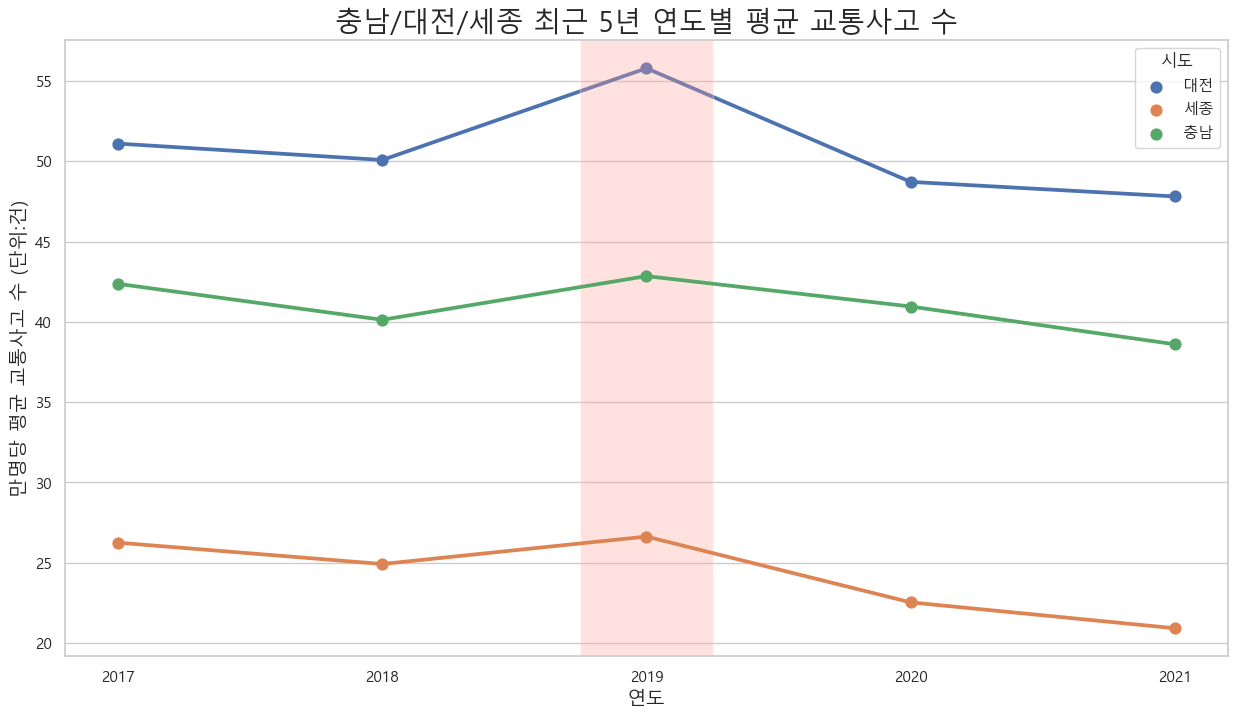

In [22]:
fig = plt.gcf()
sns.pointplot(hue=tmp_df['시도'], y=tmp_df['사건수/popu*10000'],x=tmp_df['년도'])
plt.axvspan(1.75, 2.25, facecolor='r', alpha=0.3)
plt.xlabel('연도',fontsize=14)
plt.ylabel('만명당 평균 교통사고 수 (단위:건)',fontsize=14)
plt.title('충남/대전/세종 최근 5년 연도별 평균 교통사고 수',fontsize=20)
fig.savefig('./pngs/kosis_type_year_popu.png')

In [23]:
road_acc = pd.read_csv('./data/kosis_data/road_acc.csv',encoding='cp949').drop(columns=['Unnamed: 10']).fillna(0)
road_acc = road_acc.rename(columns={'2017 년':'2017', '2018 년':'2018', '2019 년':'2019', '2020 년':'2020', '2021 년':'2021'}).astype({'2017':int, '2018':int, '2019':int, '2020':int, '2021':int})
road_acc

,도로형태별,시간대별,월별,항목,단위,2017,2018,2019,2020,2021
0,터널안,00시-02시,전체,사고건수[건],건,26,30,30,27,31
1,터널안,00시-02시,전체,사망자수[명],명,2,2,2,1,6
2,터널안,00시-02시,전체,부상자수[명],명,60,50,47,41,48
3,터널안,00시-02시,1월,사고건수[건],건,3,6,4,1,1
4,터널안,00시-02시,1월,사망자수[명],명,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4282,기타단일로,22시-24시,11월,사망자수[명],명,21,14,11,8,18
4283,기타단일로,22시-24시,11월,부상자수[명],명,933,789,737,626,614
4284,기타단일로,22시-24시,12월,사고건수[건],건,737,566,623,342,406
4285,기타단일로,22시-24시,12월,사망자수[명],명,18,11,15,2,17


In [24]:
road_acc['도로형태별'].value_counts()

터널안          468
교차로내         468
기타/불명        468
교량위          468
교차로횡단보도내     468
고가도로위        468
교차로부근        468
지하차도(도로)내    468
기타단일로        468
철길건널목         75
Name: 도로형태별, dtype: int64

In [25]:
road_acc.loc[(road_acc['도로형태별']!='철길건널목')].iloc[3:39:3,:]

,도로형태별,시간대별,월별,항목,단위,2017,2018,2019,2020,2021
3,터널안,00시-02시,1월,사고건수[건],건,3,6,4,1,1
6,터널안,00시-02시,2월,사고건수[건],건,1,3,4,2,5
9,터널안,00시-02시,3월,사고건수[건],건,2,2,0,4,3
12,터널안,00시-02시,4월,사고건수[건],건,0,2,2,2,0
15,터널안,00시-02시,5월,사고건수[건],건,3,3,5,3,1
18,터널안,00시-02시,6월,사고건수[건],건,2,2,1,1,1
21,터널안,00시-02시,7월,사고건수[건],건,2,3,1,2,4
24,터널안,00시-02시,8월,사고건수[건],건,3,1,3,3,1
27,터널안,00시-02시,9월,사고건수[건],건,2,1,1,1,2
30,터널안,00시-02시,10월,사고건수[건],건,1,1,3,3,7


In [26]:
road_acc.loc[(road_acc['도로형태별']!='철길건널목')].iloc[3*14:39*12:39,:]


,도로형태별,시간대별,월별,항목,단위,2017,2018,2019,2020,2021
42,터널안,02시-04시,1월,사고건수[건],건,2,4,1,1,1
81,터널안,04시-06시,1월,사고건수[건],건,4,4,1,2,1
120,터널안,06시-08시,1월,사고건수[건],건,3,4,1,5,3
159,터널안,08시-10시,1월,사고건수[건],건,5,14,8,8,5
198,터널안,10시-12시,1월,사고건수[건],건,7,7,11,4,6
237,터널안,12시-14시,1월,사고건수[건],건,7,8,6,5,10
276,터널안,14시-16시,1월,사고건수[건],건,9,5,11,15,8
315,터널안,16시-18시,1월,사고건수[건],건,9,8,5,9,2
354,터널안,18시-20시,1월,사고건수[건],건,5,11,2,5,10
393,터널안,20시-22시,1월,사고건수[건],건,3,3,1,2,5


In [27]:
road_acc.loc[(road_acc['도로형태별']=='터널안') & (road_acc['월별']=='전체') & (road_acc['항목']=='사고건수[건]')]

,도로형태별,시간대별,월별,항목,단위,2017,2018,2019,2020,2021
0,터널안,00시-02시,전체,사고건수[건],건,26,30,30,27,31
39,터널안,02시-04시,전체,사고건수[건],건,18,30,21,24,28
78,터널안,04시-06시,전체,사고건수[건],건,21,36,16,21,26
117,터널안,06시-08시,전체,사고건수[건],건,50,50,55,59,49
156,터널안,08시-10시,전체,사고건수[건],건,80,117,101,84,81
195,터널안,10시-12시,전체,사고건수[건],건,103,79,108,87,93
234,터널안,12시-14시,전체,사고건수[건],건,77,74,78,98,94
273,터널안,14시-16시,전체,사고건수[건],건,101,104,123,117,117
312,터널안,16시-18시,전체,사고건수[건],건,113,101,92,106,112
351,터널안,18시-20시,전체,사고건수[건],건,76,82,84,88,123


In [28]:
road_acc.loc[(road_acc['도로형태별']!='철길건널목')].iloc[3*1:39*12:39,:]

,도로형태별,시간대별,월별,항목,단위,2017,2018,2019,2020,2021
3,터널안,00시-02시,1월,사고건수[건],건,3,6,4,1,1
42,터널안,02시-04시,1월,사고건수[건],건,2,4,1,1,1
81,터널안,04시-06시,1월,사고건수[건],건,4,4,1,2,1
120,터널안,06시-08시,1월,사고건수[건],건,3,4,1,5,3
159,터널안,08시-10시,1월,사고건수[건],건,5,14,8,8,5
198,터널안,10시-12시,1월,사고건수[건],건,7,7,11,4,6
237,터널안,12시-14시,1월,사고건수[건],건,7,8,6,5,10
276,터널안,14시-16시,1월,사고건수[건],건,9,5,11,15,8
315,터널안,16시-18시,1월,사고건수[건],건,9,8,5,9,2
354,터널안,18시-20시,1월,사고건수[건],건,5,11,2,5,10


In [29]:
road_type_time_acc = road_acc.loc[(road_acc['도로형태별']!='철길건널목') & (road_acc['월별']=='전체') & (road_acc['항목']=='사고건수[건]')].reset_index().drop(columns=['index'])
mean_y5 = [(road_type_time_acc['2017'][x]+road_type_time_acc['2018'][x]+road_type_time_acc['2019'][x]+road_type_time_acc['2020'][x]+road_type_time_acc['2021'][x])/5 for x in range(len(road_type_time_acc))]
road_type_time_acc['mean_y5'] = mean_y5
road_type_time_acc

,도로형태별,시간대별,월별,항목,단위,2017,2018,2019,2020,2021,mean_y5
0,터널안,00시-02시,전체,사고건수[건],건,26,30,30,27,31,28.8
1,터널안,02시-04시,전체,사고건수[건],건,18,30,21,24,28,24.2
2,터널안,04시-06시,전체,사고건수[건],건,21,36,16,21,26,24.0
3,터널안,06시-08시,전체,사고건수[건],건,50,50,55,59,49,52.6
4,터널안,08시-10시,전체,사고건수[건],건,80,117,101,84,81,92.6
...,...,...,...,...,...,...,...,...,...,...,...
103,기타단일로,14시-16시,전체,사고건수[건],건,11577,10840,11673,10767,10604,11092.2
104,기타단일로,16시-18시,전체,사고건수[건],건,12710,12328,13134,11983,11900,12411.0
105,기타단일로,18시-20시,전체,사고건수[건],건,13806,13190,13993,12710,12264,13192.6
106,기타단일로,20시-22시,전체,사고건수[건],건,10084,9298,9071,8372,8062,8977.4


In [30]:
road_type_time_minor = road_type_time_acc.loc[road_type_time_acc['도로형태별'].isin(['터널안', '기타/불명', '고가도로위', '지하차도(도로)내'])]
road_type_time_major = road_type_time_acc.loc[road_type_time_acc['도로형태별'].isin(['교차로내', '교차로부근', '교차로횡단보도내', '기타단일로'])]

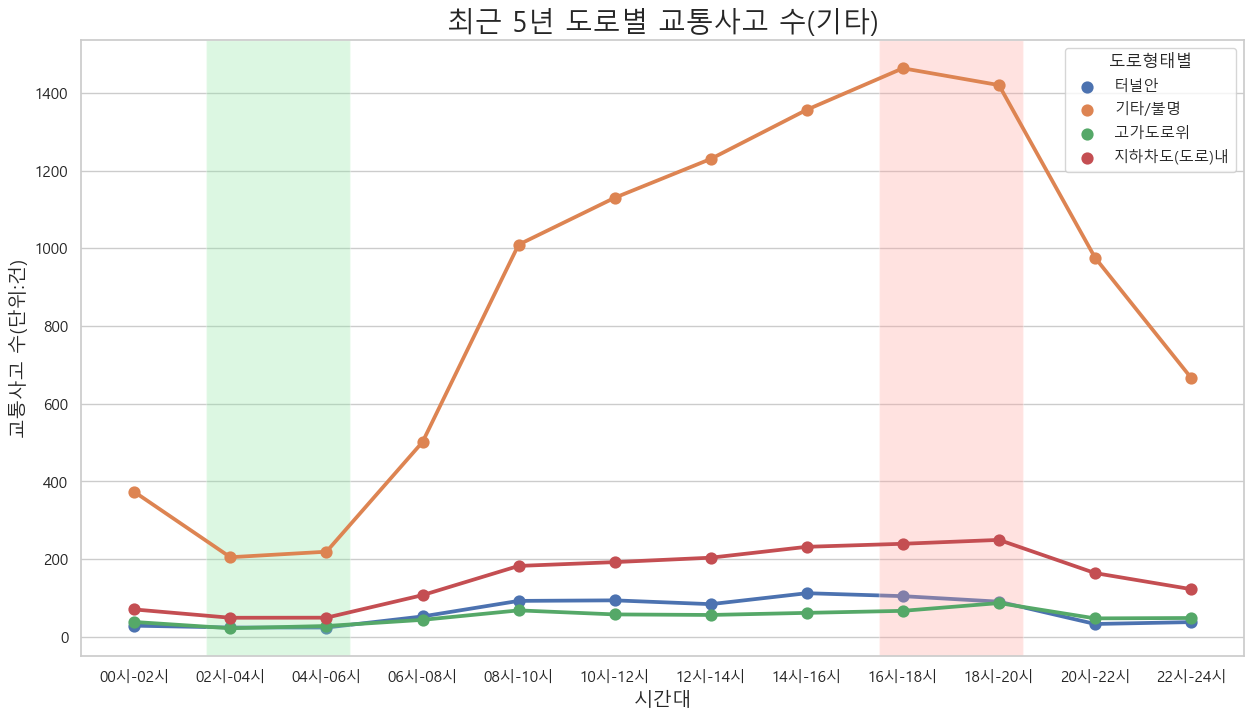

In [31]:
fig = plt.gcf()
sns.pointplot(x = road_type_time_minor.시간대별, y=road_type_time_minor['mean_y5'], hue=road_type_time_minor.도로형태별)
plt.axvspan(0.75, 2.25, facecolor='g', alpha=0.3)
plt.axvspan(7.75, 9.25, facecolor='r', alpha=0.3)

plt.xlabel('시간대', fontsize=14)
plt.ylabel('교통사고 수(단위:건)', fontsize=14)
plt.title('최근 5년 도로별 교통사고 수(기타)', fontsize=20)
fig.savefig('./pngs/kosis_type_road_etc.png')

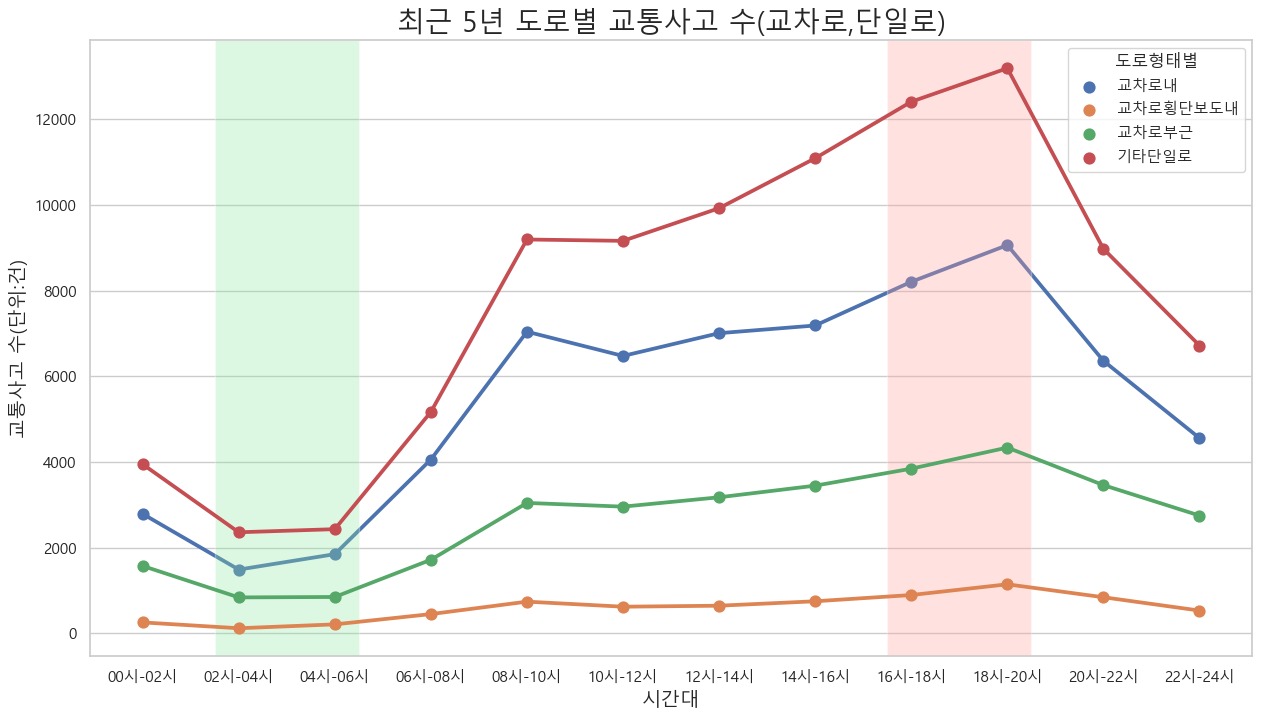

In [32]:
fig = plt.gcf()
sns.pointplot(x = road_type_time_major.시간대별, y=road_type_time_major['mean_y5'], hue=road_type_time_major.도로형태별)
plt.axvspan(0.75, 2.25, facecolor='g', alpha=0.3)
plt.axvspan(7.75, 9.25, facecolor='r', alpha=0.3)
plt.xlabel('시간대', fontsize=14)
plt.ylabel('교통사고 수(단위:건)', fontsize=14)
plt.title('최근 5년 도로별 교통사고 수(교차로,단일로)', fontsize=20)
fig.savefig('./pngs/kosis_type_road_single_ic.png')

In [33]:
road_acc.iloc[::39,:].head(20)

,도로형태별,시간대별,월별,항목,단위,2017,2018,2019,2020,2021
0,터널안,00시-02시,전체,사고건수[건],건,26,30,30,27,31
39,터널안,02시-04시,전체,사고건수[건],건,18,30,21,24,28
78,터널안,04시-06시,전체,사고건수[건],건,21,36,16,21,26
117,터널안,06시-08시,전체,사고건수[건],건,50,50,55,59,49
156,터널안,08시-10시,전체,사고건수[건],건,80,117,101,84,81
195,터널안,10시-12시,전체,사고건수[건],건,103,79,108,87,93
234,터널안,12시-14시,전체,사고건수[건],건,77,74,78,98,94
273,터널안,14시-16시,전체,사고건수[건],건,101,104,123,117,117
312,터널안,16시-18시,전체,사고건수[건],건,113,101,92,106,112
351,터널안,18시-20시,전체,사고건수[건],건,76,82,84,88,123


In [34]:
road_acc['시간대별'].value_counts()

08시-10시    363
10시-12시    363
14시-16시    363
12시-14시    360
18시-20시    360
22시-24시    360
06시-08시    357
20시-22시    357
00시-02시    351
02시-04시    351
04시-06시    351
16시-18시    351
Name: 시간대별, dtype: int64